# This notebook calculates the concentration of Cu and Ba during mantle melting in the presence of sulfide.
If you use, or adapt this code, please cite Wieser et al., (2020), GCA, https://doi.org/10.1016/j.gca2020.05.018
- Lee model Uses S solubility, calculated using Mavrogenes and ONeill (1998) coefficients for basalt. No melt compositoin term

## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss

# Loading Plotting Details

In [2]:
Modes=pd.DataFrame(data={'ol': 0.6, 'opx': 0.2, 
       'cpx': 0.18, 'sp': 0.02, 'gt': 0}, index=[0])

KDs_Cu=pd.DataFrame(data={'element': 'Cu',
        'ol': 0.048, 'opx': 0.034, 
        'cpx': 0.043, 'sp': 0.223, 'gt': 0, 'sulf': 800}, index=[0])



## Run for each element here, using the list of KDs

In [3]:
df_Cu_200S=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes,
                        M_Max=0.01,
                        KDs=KDs_Cu,
                        S_Sulf=363636, elem_Per=30,
                        S_Mantle=[200],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)
df_Cu_200S.head()

,F,M,Cu_KD,Cu_Melt_Agg,Cu_Melt_Inst,Cu_residue,S_residue,S_Melt,XSulf
0,0.00000,1.00000,0.487774,0.000000,0.000000,30.000000,200.000000,980.787209,0.000550
1,0.00033,0.99967,0.487207,61.535775,61.535775,29.989586,199.742169,980.787209,0.000549
2,0.00066,0.99934,0.486639,61.560949,61.586123,29.979149,199.484168,980.787209,0.000549
3,0.00099,0.99901,0.486071,61.586162,61.636588,29.968688,199.225996,980.787209,0.000548
4,0.00132,0.99868,0.485503,61.611414,61.687170,29.958204,198.967654,980.787209,0.000547


## Comparison between Lee spreadsheet and PySulfSat
- We have corrected a slight simplification in Lee. Basically, we use the equation for batch/eq melting, where Kd is not P, beause the sulfide melts preferentially during the interval
- At small enough N, these give identical results, as at that point P is basically Kd

See the slides from this amazing website from Ken Rubin!: https://www.soest.hawaii.edu/krubin/GG325/lect37.pdf

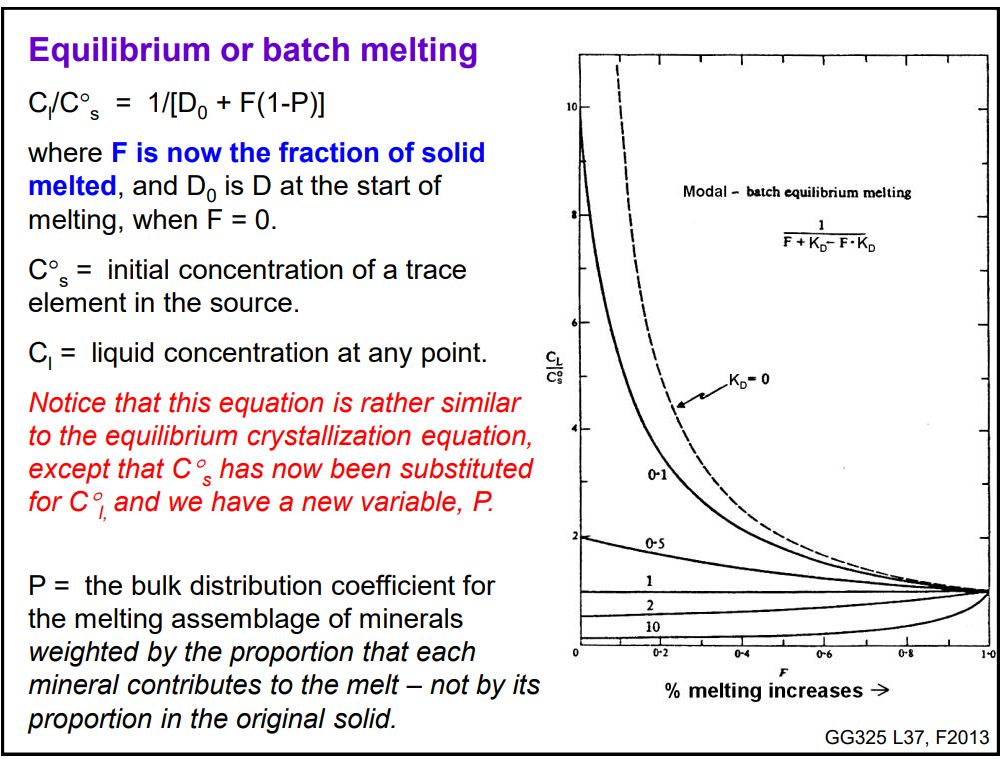

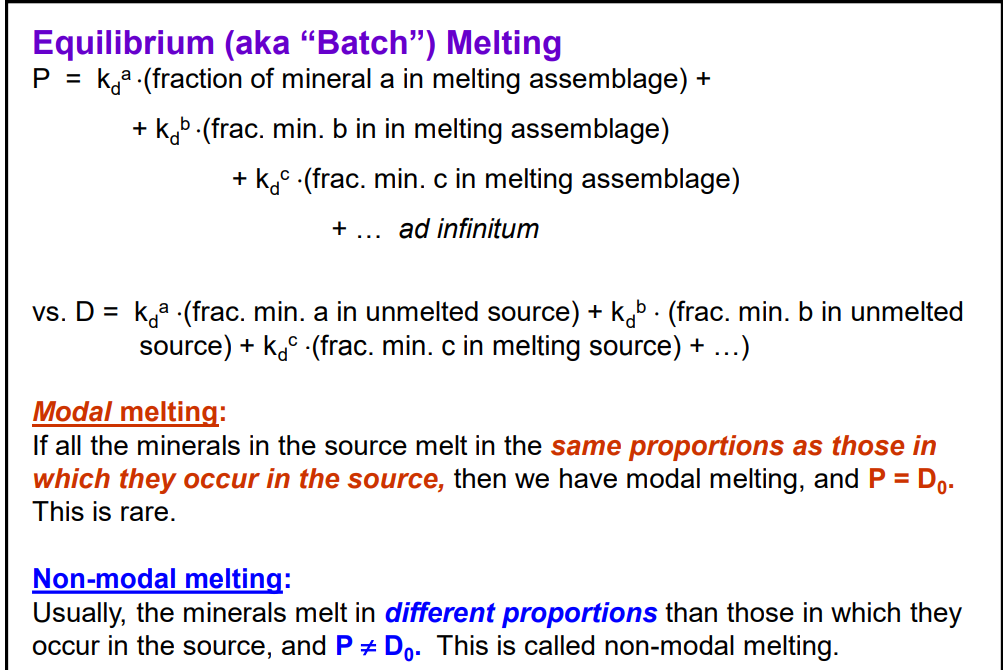

In [4]:
Lee_df=pd.read_excel('Lee_Supporting_Info_Melting.xlsx',
                     sheet_name='PySulfSat_Comparison')

In [5]:
len(Lee_df)

100

### Plot showing a small discrepency using N=3001 steps in Python and 100 steps in Lee

(0.5, 1.0)

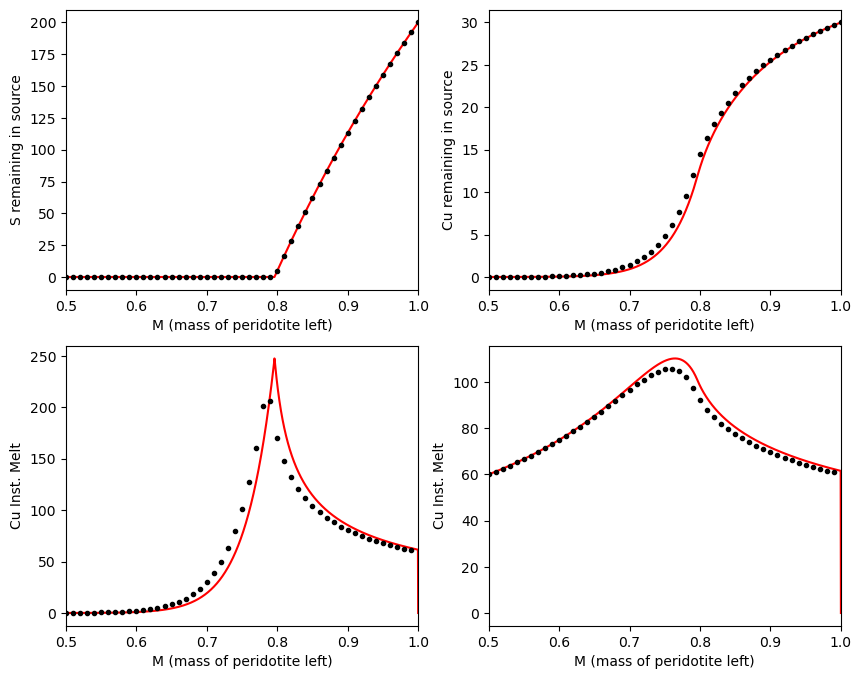

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
# S left in source
ax1.plot(df_Cu_200S['M'], df_Cu_200S['S_residue'], '-r',
        label='PySulfSat')
ax1.plot(Lee_df['mass of peridotite residue'],
         Lee_df['S ppm'], '.k', label='Lee')
ax1.set_xlabel('M (mass of peridotite left)')
ax1.set_ylabel('S remaining in source')
ax1.set_xlim([0.5, 1])

# Cu left in source
ax2.plot(df_Cu_200S['M'], df_Cu_200S['Cu_residue'], '-r',
        label='PySulfSat')
ax2.plot(Lee_df['mass of peridotite residue'],
         Lee_df['Cu ppm'], '.k', label='Lee')
ax2.set_xlabel('M (mass of peridotite left)')
ax2.set_ylabel('Cu remaining in source')
ax2.set_xlim([0.5, 1])

# Instantaneous melt Cu
ax3.plot(df_Cu_200S['M'], df_Cu_200S['Cu_Melt_Inst'], '-r',
        label='PySulfSat')
ax3.plot(Lee_df['mass of peridotite residue'],
         Lee_df['Cu ppm instant'], '.k', label='Lee')
ax3.set_xlabel('M (mass of peridotite left)')
ax3.set_ylabel('Cu Inst. Melt')
ax3.set_xlim([0.5, 1])

# Aggregated melt Cu
ax4.plot(df_Cu_200S['M'], df_Cu_200S['Cu_Melt_Agg'], '-r',
        label='PySulfSat')
ax4.plot(Lee_df['mass of peridotite residue'],
         Lee_df['Cu ppm aggregate'], '.k', label='Lee')
ax4.set_xlabel('M (mass of peridotite left)')
ax4.set_ylabel('Cu Inst. Melt')
ax4.set_xlim([0.5, 1])

## Lets reduce the step size of Lee, to 0.0005

In [7]:
Lee_df_tiny=pd.read_excel('Lee_Supporting_Info_Melting.xlsx',
                     sheet_name='Lee_tinyStep')

(0.5, 1.0)

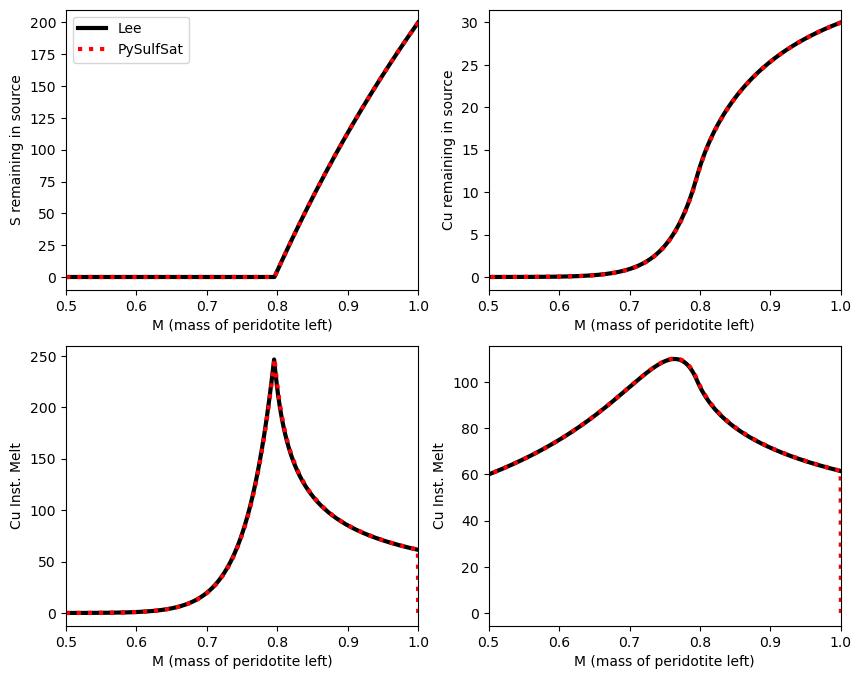

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
# S left in source

ax1.plot(Lee_df_tiny['mass of peridotite residue'],
         Lee_df_tiny['S ppm'], '-k', lw=3, label='Lee')
ax1.plot(df_Cu_200S['M'], df_Cu_200S['S_residue'], ':r', lw=3,
        label='PySulfSat')
ax1.set_xlabel('M (mass of peridotite left)')
ax1.set_ylabel('S remaining in source')
ax1.set_xlim([0.5, 1])
ax1.legend()
# Cu left in source

ax2.plot(Lee_df_tiny['mass of peridotite residue'],
         Lee_df_tiny['Cu ppm'], '-k', lw=3,  label='Lee')
ax2.plot(df_Cu_200S['M'], df_Cu_200S['Cu_residue'], ':r', lw=3,
        label='PySulfSat')
ax2.set_xlabel('M (mass of peridotite left)')
ax2.set_ylabel('Cu remaining in source')
ax2.set_xlim([0.5, 1])

# Instantaneous melt Cu

ax3.plot(Lee_df_tiny['mass of peridotite residue'],
         Lee_df_tiny['Cu ppm instant'], '-k', lw=3,  label='Lee')
ax3.plot(df_Cu_200S['M'], df_Cu_200S['Cu_Melt_Inst'],':r', lw=3,
        label='PySulfSat')
ax3.set_xlabel('M (mass of peridotite left)')
ax3.set_ylabel('Cu Inst. Melt')
ax3.set_xlim([0.5, 1])

# Aggregated melt Cu

ax4.plot(Lee_df_tiny['mass of peridotite residue'],
         Lee_df_tiny['Cu ppm aggregate'], '-k', lw=3, label='Lee')
ax4.plot(df_Cu_200S['M'], df_Cu_200S['Cu_Melt_Agg'], ':r', lw=3,
        label='PySulfSat')
ax4.set_xlabel('M (mass of peridotite left)')
ax4.set_ylabel('Cu Inst. Melt')
ax4.set_xlim([0.5, 1])

## Now lets try changing silicate proportions
- It shouldnt make that much difference for Cu, as the KDs are so much lower for silicate than sulfide, but we can convince ourselves of that here. 

In [9]:
Lee_df_Sil=pd.read_excel('Lee_Supporting_Info_Melting.xlsx',
                     sheet_name='Lee_tiny_step_ChangingSil')

In [10]:
Modes2=pd.DataFrame(data={'ol': Lee_df_Sil['ol_i'],
                        'cpx': Lee_df_Sil['cpx_i'],
                        'opx': Lee_df_Sil['opx_i'],
                        'sp': Lee_df_Sil['sp_i'],
                        'gt': Lee_df_Sil['opx_i']*0})

In [11]:
df_Cu_200S_changeSi=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes2,
                        M_Max=0.01,
                        KDs=KDs_Cu,
                        S_Sulf=363636, elem_Per=30,
                        S_Mantle=[200],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)

df_Cu_100S_changeSi=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes2,
                        M_Max=0.01,
                        KDs=KDs_Cu,
                        S_Sulf=363636, elem_Per=30,
                        S_Mantle=[100],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)

df_Cu_300S_changeSi=ss.Lee_Wieser_sulfide_melting(N=3000, Modes=Modes2,
                        M_Max=0.01,
                        KDs=KDs_Cu,
                        S_Sulf=363636, elem_Per=30,
                        S_Mantle=[300],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)


df_Cu_200S_changeSi.head()


g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\mantle_melting.py:42: UserWarning: You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe
  w.warn('You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe')


,F,M,Cu_KD,Cu_Melt_Agg,Cu_Melt_Inst,Cu_residue,S_residue,S_Melt,XSulf
0,0.000000,1.000000,0.487774,0.000000,0.000000,30.000000,200.000000,980.787209,0.000550
1,0.000764,0.999236,0.486463,61.577873,61.577873,29.975841,199.402648,980.787209,0.000548
2,0.001529,0.998471,0.485149,61.636281,61.694689,29.951555,198.804381,980.787209,0.000547
3,0.002293,0.997707,0.483833,61.694900,61.812136,29.927143,198.205198,980.787209,0.000545
4,0.003058,0.996942,0.482516,61.753729,61.930219,29.902602,197.605096,980.787209,0.000543


(0.5, 1.0)

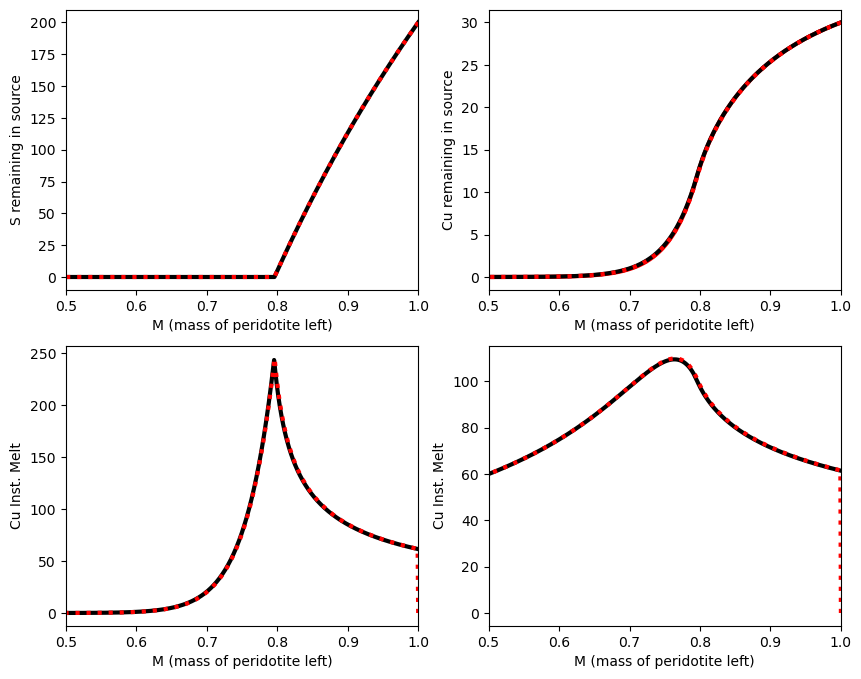

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
# S left in source

ax1.plot(Lee_df_Sil['mass of peridotite residue'],
         Lee_df_Sil['S ppm'], '-k', lw=3, label='Lee')
ax1.plot(df_Cu_200S_changeSi['M'], df_Cu_200S_changeSi['S_residue'], ':r', lw=3,
        label='PySulfSat')
ax1.set_xlabel('M (mass of peridotite left)')
ax1.set_ylabel('S remaining in source')
ax1.set_xlim([0.5, 1])

# Cu left in source
ax2.plot(Lee_df_tiny['mass of peridotite residue'],
         Lee_df_tiny['Cu ppm'], '-r', lw=3,  label='Lee')

ax2.plot(Lee_df_Sil['mass of peridotite residue'],
         Lee_df_Sil['Cu ppm'], '-k', lw=3,  label='Lee')
ax2.plot(df_Cu_200S_changeSi['M'], df_Cu_200S_changeSi['Cu_residue'], ':r', lw=3,
        label='PySulfSat')
ax2.set_xlabel('M (mass of peridotite left)')
ax2.set_ylabel('Cu remaining in source')
ax2.set_xlim([0.5, 1])

# Instantaneous melt Cu

ax3.plot(Lee_df_Sil['mass of peridotite residue'],
         Lee_df_Sil['Cu ppm instant'], '-k', lw=3,  label='Lee')
ax3.plot(df_Cu_200S_changeSi['M'], df_Cu_200S_changeSi['Cu_Melt_Inst'],':r', lw=3,
        label='PySulfSat')
ax3.set_xlabel('M (mass of peridotite left)')
ax3.set_ylabel('Cu Inst. Melt')
ax3.set_xlim([0.5, 1])

# Aggregated melt Cu

ax4.plot(Lee_df_Sil['mass of peridotite residue'],
         Lee_df_Sil['Cu ppm aggregate'], '-k', lw=3, label='Lee')
ax4.plot(df_Cu_200S_changeSi['M'], df_Cu_200S_changeSi['Cu_Melt_Agg'], ':r', lw=3,
        label='PySulfSat')
ax4.set_xlabel('M (mass of peridotite left)')
ax4.set_ylabel('Cu Inst. Melt')
ax4.set_xlim([0.5, 1])

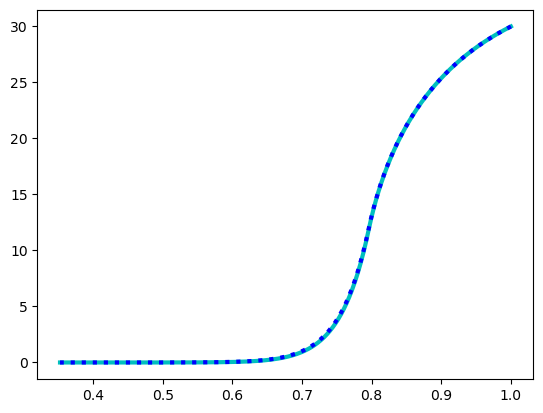

In [13]:
plt.plot(Lee_df_tiny['mass of peridotite residue'],
         Lee_df_tiny['Cu ppm'], '-c', lw=3,  label='Lee')

plt.plot(Lee_df_Sil['mass of peridotite residue'],
         Lee_df_Sil['Cu ppm'], ':b', lw=3,  label='Lee')

## now lets use it for other elements
- Lets choose an element like Ba which barely goes into the sulfide. 

In [14]:
KDs_Ba=pd.DataFrame(data={'element': 'Ba',
'ol': 0.000005, 'opx': 0.000006, 
'cpx': 0.0004, 'sp': 0.223, 'gt': 0.00007, 'sulf': 0 }, index=[0])



In [15]:
df_Ba_200S_changeSi=ss.Lee_Wieser_sulfide_melting(N=3000, 
                        Modes=Modes2,
                        M_Max=0.01,
                        KDs=KDs_Ba,
                        S_Sulf=363636, elem_Per=30,
                        S_Mantle=[200],
                        S_Melt_SCSS_2=980.7872088,
                         Prop_S6=0)
df_Ba_200S_changeSi.head()


g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\mantle_melting.py:42: UserWarning: You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe
  w.warn('You have inputted a dataframe of silicate modes that doesnt match the number of steps you asked for. We are changing the number of steps to match the length of your dataframe')


,F,M,Ba_KD,Ba_Melt_Agg,Ba_Melt_Inst,Ba_residue,S_residue,S_Melt,XSulf
0,0.000000,1.000000,0.004534,0.000000,0.000000,30.000000,200.000000,980.787209,0.000550
1,0.000764,0.999236,0.004534,5666.018119,5666.018119,25.688087,199.402648,980.787209,0.000548
2,0.001529,0.998471,0.004533,5258.648753,4851.279386,21.993376,198.804381,980.787209,0.000547
3,0.002293,0.997707,0.004533,4890.170026,4153.212573,18.827887,198.205198,980.787209,0.000545
4,0.003058,0.996942,0.004533,4556.422344,3555.179297,16.116129,197.605096,980.787209,0.000543
